In [173]:
import time
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram

from Agnes import Agnes
from utils import report
from DBscan import DBscan 

import warnings
warnings.filterwarnings("ignore") 
cmap = 'Spectral'

In [174]:
data = pd.read_csv('datset.csv') 
cat = ['OverTime', 'MaritalStatus', 'JobRole', 'Gender', 'EducationField', 'Department', 'BusinessTravel', 'Attrition']
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)
for i in cat:
    data[i] = (data[i].astype('category').cat.codes).apply(np.int64)
X, y = data.drop(['Attrition'], axis=1), data['Attrition']

In [180]:
X, y = np.array(X), list(y)

data_x = data.drop(['Attrition'], axis=1)
X_standardized = np.array((data_x - data_x.mean()) / data_x.std())
X_normalized = np.array(((data_x - data_x.min()) / (data_x.max() - data_x.min())))

### Hamming
Saving matrix

In [12]:
dbscan = DBscan(eps=20, min_samples=3, similarity='hamming') 
dbscan.cluster(X, stop=True) 
np.save('DBscan//Distances_Hamming.npy', dbscan.dist_matrix)

Calculating distance matrix...


100%|██████████| 1470/1470 [03:10<00:00,  7.72it/s]


Grid Search

In [156]:
dist_matrix = np.load('DBscan//Distances_Hamming.npy')

In [83]:
for eps in range(1, 20):
    for min_samples in range(1, 5):
        dbscan = DBscan(eps=eps, min_samples=min_samples, similarity='hamming') 

        clusters = dbscan.cluster(X, dist_matrix=dist_matrix) 
        if len(np.unique(clusters)) > 1:
            print(eps, min_samples, len(np.unique(clusters)) - 1, list(clusters).count(-2))

9 1 2 1468
10 1 21 1449
10 2 1 1469
11 1 60 1410
11 2 12 1450
11 3 3 1462
11 4 1 1467
12 1 177 1293
12 2 57 1388
12 3 26 1417
12 4 13 1431
13 1 418 1052
13 2 201 1169
13 3 120 1252
13 4 72 1303
14 1 806 664
14 2 527 743
14 3 374 835
14 4 281 903
15 1 1167 303
15 2 954 330
15 3 803 371
15 4 669 417
16 1 1375 95
16 2 1270 97
16 3 1181 111
16 4 1116 126
17 1 1453 17
17 2 1431 17
17 3 1403 17
17 4 1375 17
18 1 1468 2
18 2 1467 2
18 3 1464 2
18 4 1460 2
19 1 1469 0
19 2 1469 0
19 3 1469 0
19 4 1467 0


In [18]:
eps_list = range(1, 30)
min_samples_list = range(1, 20)
nb_clusters = np.zeros((len(eps_list) + 1, len(min_samples_list) + 1))
noises = np.zeros((len(eps_list) + 1, len(min_samples_list) + 1))

for eps in tqdm(eps_list):
    for min_samples in min_samples_list:
        dbscan = DBscan(eps=eps, min_samples=min_samples, similarity='hamming') 
        clusters = dbscan.cluster(X, dist_matrix=dist_matrix) 
        nb_clusters[eps, min_samples] = len(np.unique(clusters)) - 1 
        noises[eps, min_samples] = list(clusters).count(-2)
        
np.save('DBscan//nb_clusters_30_20_Hamming.npy', nb_clusters) 
np.save('DBscan//noises_30_20_Hamming.npy', noises) 

100%|██████████| 29/29 [16:52<00:00, 34.92s/it]


### Manhattan


In [ ]:
dbscan = DBscan(eps=20, min_samples=3, similarity='manhattan') 
dbscan.cluster(X, stop=True) 
np.save('DBscan//Distances_Manhattan.npy', dbscan.dist_matrix)

In [ ]:
dbscan = DBscan(eps=20, min_samples=3, similarity='manhattan') 
dbscan.cluster(X_standardized, stop=True) 
np.save('DBscan//Distances_Manhattan_Std.npy', dbscan.dist_matrix)

In [141]:
dbscan = DBscan(eps=20, min_samples=3, similarity='manhattan') 
dbscan.cluster(X_normalized, stop=True) 
np.save('DBscan//Distances_Manhattan_Norm.npy', dbscan.dist_matrix)

Calculating distance matrix...


100%|██████████| 1470/1470 [00:23<00:00, 63.51it/s]


Grid Search


In [164]:
dist_matrix = np.load('DBscan//Distances_Manhattan_Norm.npy') 

In [155]:
np.max(dist_matrix)

19.499781669310412

In [153]:
dbscan = DBscan(eps=, min_samples=10, similarity='manhattan') 
clusters = dbscan.cluster(X_normalized, dist_matrix=dist_matrix)
len(np.unique(clusters)) - 1, list(clusters).count(-2) 

(1469, 0)

In [103]:
eps_list[5], min_samples_list

(750, range(1, 10))

In [165]:
eps_list = range(1, 20)
min_samples_list = range(1, 20)
nb_clusters = np.zeros((len(eps_list) + 1, len(min_samples_list) + 1))
noises = np.zeros((len(eps_list) + 1, len(min_samples_list) + 1))

for i, eps in enumerate(tqdm(eps_list)):
    for min_samples in min_samples_list:
        dbscan = DBscan(eps=eps, min_samples=min_samples, similarity='manhattan') 
        clusters = dbscan.cluster(X_normalized, dist_matrix=dist_matrix) 
        nb_clusters[i, min_samples] = len(np.unique(clusters)) - 1 
        noises[i, min_samples] = list(clusters).count(-2)
        
np.save('DBscan//nb_clusters_20_20_Manhattan.npy', nb_clusters) 
np.save('DBscan//noises_20_20_Manhattan.npy', noises) 

100%|██████████| 19/19 [12:25<00:00, 39.23s/it]


### Sumary


In [171]:
nb_clusters_H, noises_H = np.load('DBscan//nb_clusters_30_20_Hamming.npy'), np.load('DBscan//noises_30_20_Hamming.npy')
nb_clusters_M, noises_M = np.load('DBscan//nb_clusters_20_20_Manhattan.npy'), np.load('DBscan//noises_20_20_Manhattan.npy')

In [170]:
nb = 2
for i, j in zip(np.where(nb_clusters==nb)[0], np.where(nb_clusters==nb)[1]):
    print(noises[i, j], i, j)

1468.0 1 1


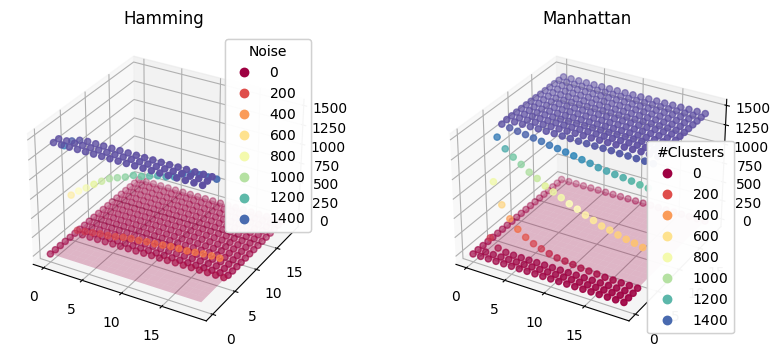

In [172]:
fig = plt.figure() 
fig.set_size_inches(10, 4)

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
data = noises_M
ny, nx = data.shape
X, Y = np.meshgrid(range(nx), range(ny))
Z = np.full((ny, nx), 2)
ax1.plot_surface(X, Y, Z,  alpha=0.26, cmap=cmap)
X = X.flatten()
Y = Y.flatten()
Z = data.flatten()
scatter = ax1.scatter(X, Y, Z, c=Z, cmap=cmap)
legend = ax1.legend(*scatter.legend_elements(), title="Noise")
ax1.add_artist(legend)
ax1.set_title('Hamming')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
data = nb_clusters_M
ny, nx = data.shape
X, Y = np.meshgrid(range(nx), range(ny))
Z = np.full((ny, nx), 2)
ax2.plot_surface(X, Y, Z,  alpha=0.26, cmap=cmap)
X = X.flatten()
Y = Y.flatten()
Z = data.flatten()
scatter = ax2.scatter(X, Y, Z, c=Z, cmap=cmap)
legend = ax2.legend(*scatter.legend_elements(), title="#Clusters")
ax2.add_artist(legend)
ax2.set_title('Manhattan')

plt.show()

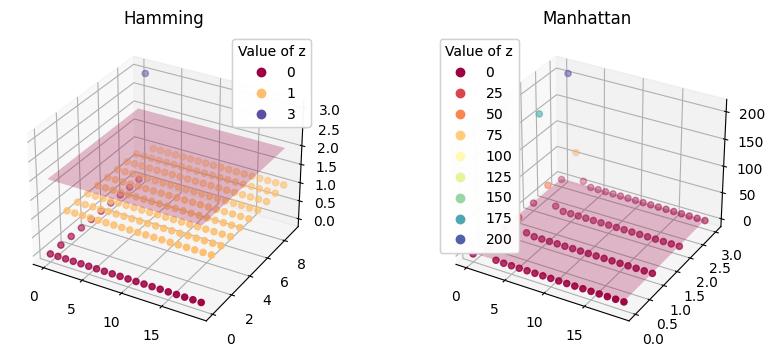

In [26]:
fig = plt.figure()
fig.set_size_inches(10, 4)

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
data = grid_hamming[:10]
ny, nx = data.shape
X, Y = np.meshgrid(range(nx), range(ny))
Z = np.full((ny, nx), 2)
ax1.plot_surface(X, Y, Z,  alpha=0.26, cmap=cmap)
X = X.flatten()
Y = Y.flatten()
Z = data.flatten()
scatter = ax1.scatter(X, Y, Z, c=Z, cmap=cmap)
legend = ax1.legend(*scatter.legend_elements(), title="Value of z")
ax1.add_artist(legend)
ax1.set_title('Hamming')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
data = grid_manhattan[:4]
ny, nx = data.shape
X, Y = np.meshgrid(range(nx), range(ny))
Z = np.full((ny, nx), 2)
ax2.plot_surface(X, Y, Z,  alpha=0.26, cmap=cmap)
X = X.flatten()
Y = Y.flatten()
Z = data.flatten()
scatter = ax2.scatter(X, Y, Z, c=Z, cmap=cmap)
legend = ax2.legend(*scatter.legend_elements(), title="Value of z")
ax2.add_artist(legend)
ax2.set_title('Manhattan')

plt.show()